In [4]:
import urllib.request
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import datetime
from enum import Enum, auto
plt.rcParams['figure.figsize'] = (30.0, 15.0)

class Color(Enum):
    GRAY = auto()
    BROWN = auto()
    GREEN = auto()
    RIGHT_BLUE = auto()
    BLUE = auto()
    YELLOW = auto()
    ORANGE = auto()
    RED = auto()
    
    
def get_color_by_rate(rate):
    if rate < 400:
        return Color.GRAY
    elif rate < 800:
        return Color.BROWN
    elif rate < 1200:
        return Color.GREEN
    elif rate < 1600:
        return Color.RIGHT_BLUE
    elif rate < 2000:
        return Color.BLUE
    elif rate < 2400:
        return Color.YELLOW
    elif rate < 2800:
        return Color.ORANGE
    else:
        return Color.RED
    
    
def get_rate_range(color):
    if color == Color.GRAY:
        return (0, 400)
    elif color == Color.BROWN:
        return (400, 800)
    elif color == Color.GREEN:
        return (800, 1200)
    elif color == Color.RIGHT_BLUE:
        return (1200, 1600)
    elif color == Color.BLUE:
        return (1600, 2000)
    elif color == Color.YELLOW:
        return (2000, 2400)
    elif color == Color.ORANGE:
        return (2400, 2800)
    else:
        return (2800, 4000)
        
    
def get_color_code(color):
    C_GRAY = '#D9D9D9'
    C_BROWN = '#D9C5B2'
    C_GREEN = '#B2D9B2'
    C_RIGHT_BLUE = '#B2ECEC'
    C_BLUE = '#B2B2FF'
    C_YELLOW = '#ECECB2'
    C_ORANGE = '#FFD9B2' 
    C_RED = '#FFB2B2'

    if color == Color.GRAY:
        return C_GRAY
    elif color == Color.BROWN:
        return C_BROWN
    elif color == Color.GREEN:
        return C_GREEN
    elif color == Color.RIGHT_BLUE:
        return C_RIGHT_BLUE
    elif color == Color.BLUE:
        return C_BLUE
    elif color == Color.YELLOW:
        return C_YELLOW
    elif color == Color.ORANGE:
        return C_ORANGE
    else:
        return C_RED
        


def get_user_info(user_name):
    url = f'https://atcoder.jp/users/{user_name}/history'
    req = urllib.request.Request(url)
    with urllib.request.urlopen(req) as res:
        soup = BeautifulSoup(res, "html.parser")
    span = soup.find_all('span')
    rate_data = [] 
    for tag in span:
        try:
            string_ = tag.get('class')
            if len(string_) == 1:
                if re.match(r'\d+', tag.string):
                    rate_data.append(int(tag.string))

        except:
            continue
    
    add = False
    date_data = []

    root = soup.find('table')
    for i, tag in enumerate(root.find_all('td')):
        if tag.get('data-search') == '[RATED]':
            add = True
        if tag.string and re.match(r'\d{4}/\d{2}/\d{2}\s\d{2}:\d{2}:\d{2}', tag.string):        
            date = datetime.datetime.strptime(tag.string, '%Y/%m/%d %H:%M:%S')
        if (i + 1) % 7 == 0 and add:
            date_data.append(date)
            add = False
    
    return date_data, rate_data


def get_users_info(user_names):
    ret_date_data = []
    ret_rate_data = []
    for user_name in user_names:
        date_data, rate_data = get_user_info(user_name)
        ret_date_data.append(date_data)
        ret_rate_data.append(rate_data)
        
    return ret_date_data, ret_rate_data
        

In [5]:
# change here
users = [
    'hiramekun',
    'gasugesu',
    'sykwer',
    'ijm',
    'veqcc'
]
date_data, rate_data = get_users_info(users)

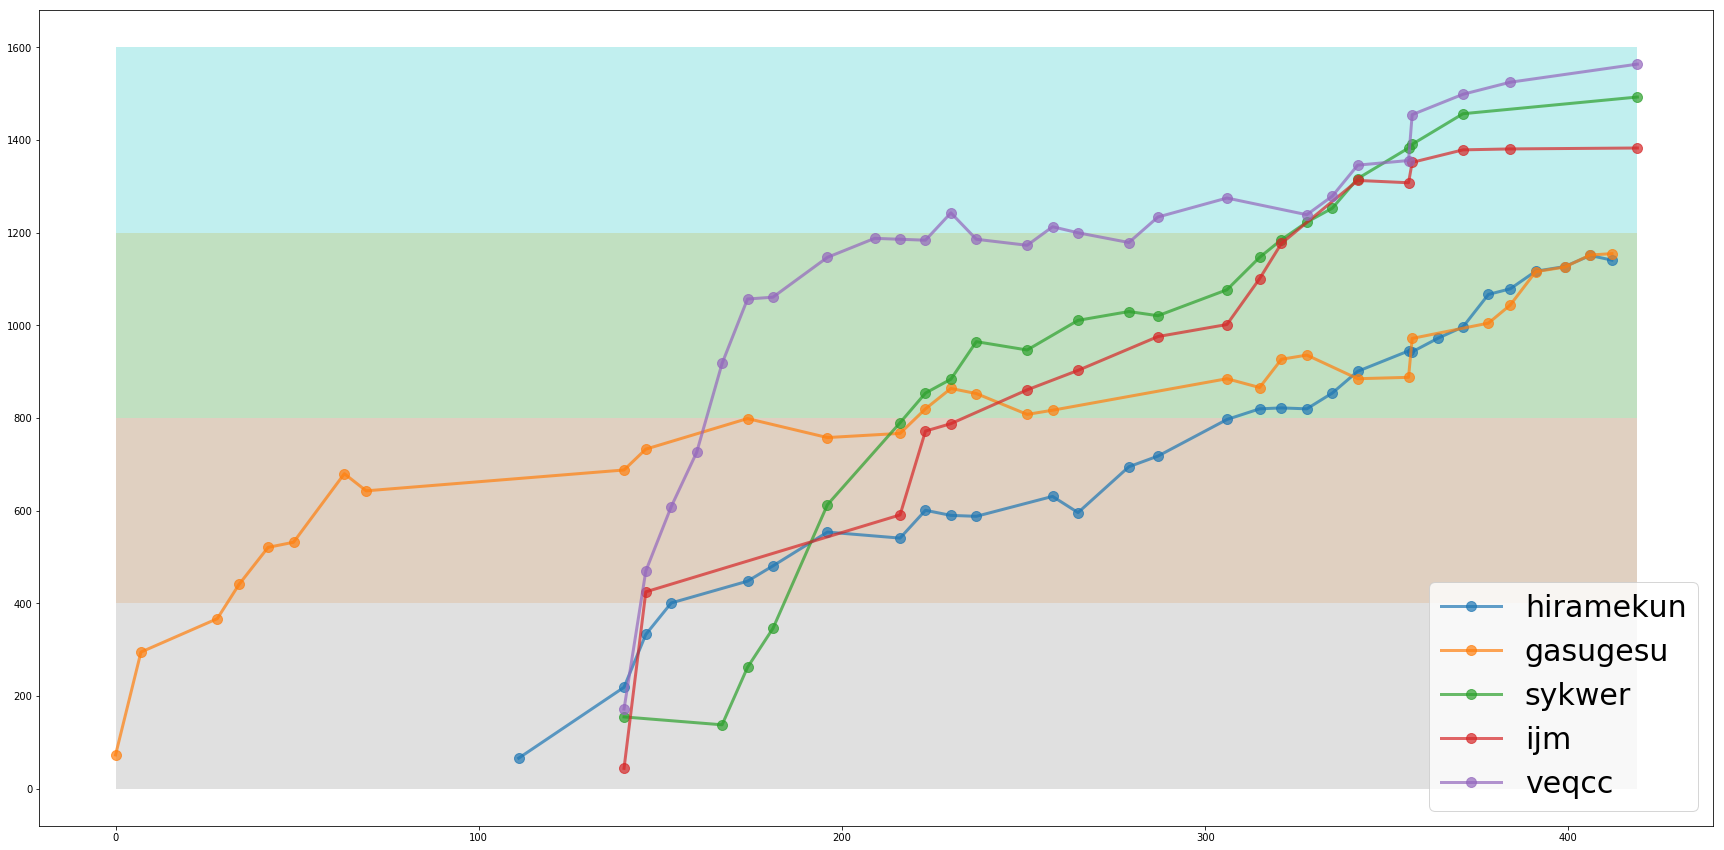

In [6]:
min_date = datetime.datetime.now()
max_date = datetime.datetime(1900, 1, 12, 9, 55, 28)
min_date = min([min(min_date, min(ar)) for ar in date_data])
max_date = max([max(max_date, min(ar)) for ar in date_data])

min_rate = 1e9
max_rate = 0
max_rate = max([max(max_rate, max(ar)) for ar in rate_data])
min_rate = min([min(min_rate, min(ar)) for ar in rate_data])

days_data = []
x_end = 0
for ds in date_data:
    temp = []
    for d in ds:
        temp.append((d - min_date).days)
        x_end = max(x_end, (d - min_date).days)
    days_data.append(temp)

x_range = (0, x_end)
for color in Color:
    y_begin, y_end = get_rate_range(color)
    if min_rate > y_end:
        continue
    plt.fill_between(x_range, y_begin, y_end, facecolor=get_color_code(color), alpha=0.8)
    if y_end > max_rate:
        break
    
for d, r in zip(days_data, rate_data):
    plt.plot(d, r, alpha=0.7, markersize=10, marker='o',linewidth=3)
plt.legend(users, loc='lower right', fontsize=30)